# Sales Channel Prediction

Description: The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The objective of this problem
    is to select the proper sales channel to predict the right sales in order to generate good revenue. This problem is considered to be classification where 'Sales' is target feature.

# Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
advertising=pd.read_csv("Advertising.csv")

In [3]:
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advertising.shape

(200, 5)

In [9]:
#There are total 5 columns and 200 rows.

Statistical Summary

In [6]:
advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Statistical Summary

In [8]:
advertising = advertising.drop('Unnamed: 0', axis=1)

In [10]:
# as we can see that the column'Unnamed' is not contributing in the analysis of predicting the dataset thus we can remove it.

In [11]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
advertising.shape

(200, 4)

In [14]:
# Now there are 4 columns and 200 rows

# EDA

Univariant Analysis

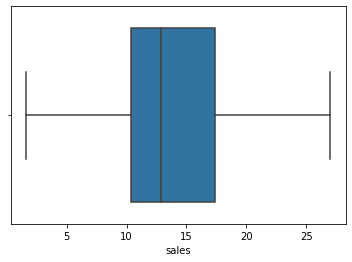

In [18]:
sns.boxplot(advertising['sales'])
plt.show()

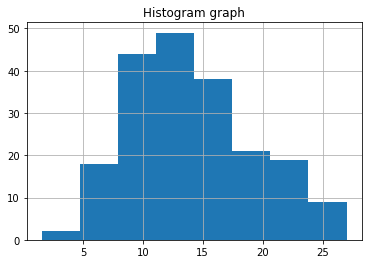

In [28]:
advertising['sales'].hist(bins=8)
plt.title('Histogram graph')
plt.show()

checking how 'sales' are related with other variables using scatterplot.

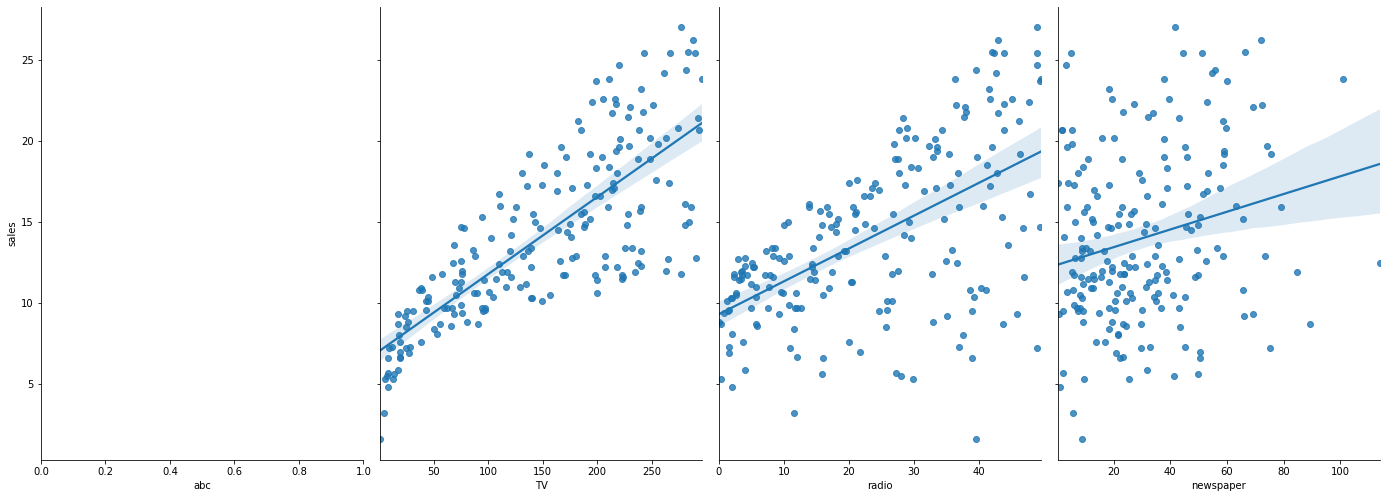

In [25]:
sns.pairplot(advertising, x_vars=['abc','TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg');
plt.show()

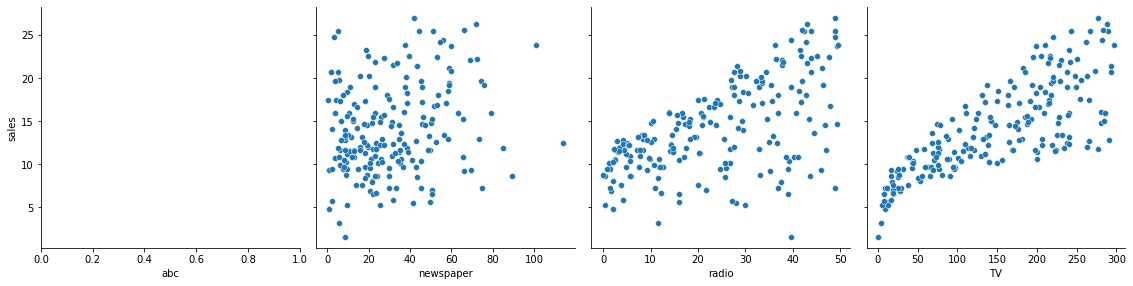

In [26]:
sns.pairplot(advertising, x_vars=['abc','newspaper', 'radio','TV'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

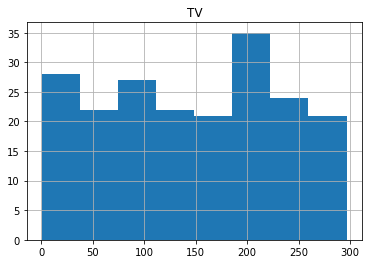

In [31]:
advertising['TV'].hist(bins=8)
plt.title('TV')
plt.show()

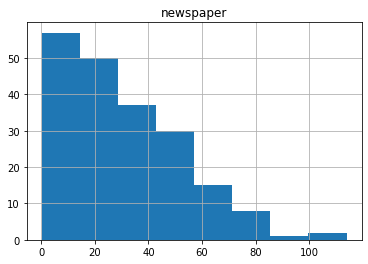

In [32]:
advertising['newspaper'].hist(bins=8)
plt.title('newspaper')
plt.show()

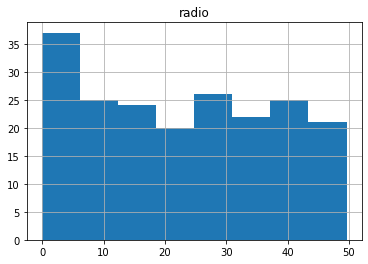

In [33]:
advertising['radio'].hist(bins=8)
plt.title('radio')
plt.show()

# Checking Correlation

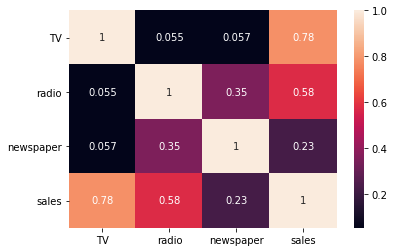

In [35]:
sns.heatmap(advertising.corr(), annot = True)
plt.show()

Observation: With aboce heatmap we can conclude that 'TV' is highly correlated to Sales thus we can goahead with 'TV' as feature variable
    to perform linear regression.

# Linear Regression

In [40]:
x = advertising['TV']
y = advertising['sales']

In [41]:
#assigning the X and Y feature variable.

# Test Train Splitting

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [60]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [62]:
lr.score(x_train,y_train) 

0.6134312469429994

In [63]:
from sklearn.metrics import mean_squared_error , classification_report

In [69]:
print(lr.intercept_)
print(lr.coef_)

6.989665857411679
[0.04649736]


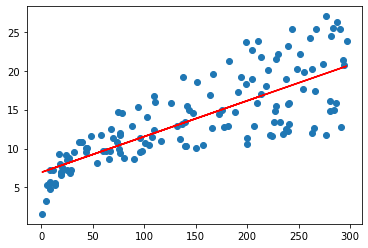

In [79]:
plt.scatter(x_train, y_train)
plt.plot(X_train, 6.948 + 0.046*x_train, 'r')
plt.show()

In [70]:
# make predictions on the testing set
y_pred = lr.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [75]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327007

In [76]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783302

In [77]:
#visualize best fit line

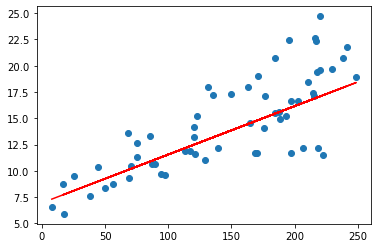

In [78]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.046 * x_test, 'r')
plt.show()

In [ ]:
Above graph shows that chosen model is accurate to find the predicted value.